# Data structures

For a refresher on object-oriented programming, see [Object-oriented programming](https://github.com/parrt/msds501/blob/master/notes/OO.ipynb).

## A simple set implementation

Sets in Python can be specified with set notation:

In [1]:
s = {1,3,2,9}

Or with by creating a `set` object and assigning it to a variable then manually adding elements:

In [2]:
s = set()
s.add(1)
s.add(3)

We can build our own set object implementation by creating a class definition:

In [3]:
class MySet:
    def __init__(self):
        self.elements = []
    def add(self, x):
        if x not in self.elements:
            self.elements.append(x)

In [4]:
s = MySet()
s.add(3)  # same as MySet.add(a,3)
s.add(3)
s.add(2)
s.add('cat')
s.elements

[3, 2, 'cat']

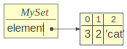

In [5]:
from lolviz import *
objviz(s)

**Question**: How expensive is it to add an element to a set with this implementation?

## Linked lists -- the gateway drug

We've studied arrays/lists that are built into Python but they are not always the best kind of list to use. Sometimes, we are inserting and deleting things from the head or middle of the list. If we do this in lists made up of contiguous cells in memory, we have to move a lot of cells around to make room for a new element or to close a hole made by a deletion. Most importantly, linked lists are the degenerate form of a general object graph. So, it makes sense to start with the simple versions and move up to general graphs.

Linked lists allow us to efficiently insert and remove things anywhere we want, at the cost of more memory.

A linked list associates a next pointer with each value. We call these things "nodes" and here's a simple implementation for node objects:

In [6]:
class LLNode:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

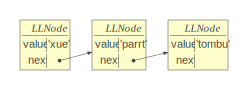

In [7]:
head = LLNode('tombu')
head = LLNode('parrt', head)
head = LLNode("xue", head)
objviz(head)

## Walk list

To palk a list, we use the notion of a cursor, which we can think of as a finger that moves along a data structure from node to node. We initialize the cursor to point to the first node of the list, the head, and then walk the cursor through the list via the `next` field:

In [8]:
p = head
while p is not None:
    print(p.value)
    p = p.next

xue
parrt
tombu


**Question**: How fast can we walk the linked list?

### Exercise

Modify the walking code so that it lives in a method of `LLNode` called `exists(self, x)` that looks for a node with value `x` starting at `self`.  If we test with `head.exists('parrt')` then `self` will be our global `head` variable. Have the function return true if `x` exists in the list, else return false. You can test it with:

```python
head = LLNode('tombu')
head = LLNode('parrt', head)
head = LLNode("xue", head)
head.exists('parrt'), head.exists('part')
```

In [9]:
class LLNode:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next
        
    def exists(self, x):
        p = self # start looking at this node
        while p is not None:
            if x==p.value:
                return True
            p = p.next
        return False
    
head = LLNode('tombu')
head = LLNode('parrt', head)
head = LLNode("xue", head)
head.exists('parrt'), head.exists('part')

(True, False)

## Insertion at head

If we want to insert an element at the front of a linked list, we create a node to hold the value and set its `next` pointer to point to the old `head`. Then we have the `head` variable point at the new node:

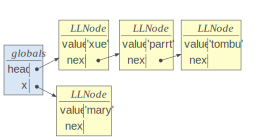

In [10]:
x = LLNode('mary')
callviz(varnames=['head','x'])

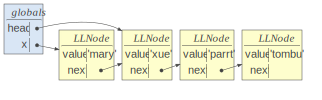

In [11]:
x.next = head
callviz(varnames=['head','x'])

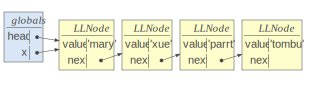

In [12]:
head = x
callviz(varnames=['head','x'])

## Deletion of node

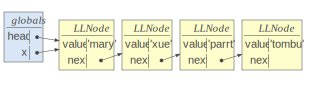

In [13]:
# to delete xue, make previous node skip over xue
xue = head.next
callviz(varnames=['head','x'])

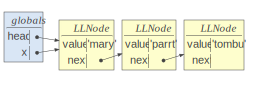

In [14]:
head.next = xue.next
callviz(varnames=['head','x'])

## Binary trees

The tree data structure is one of the most important in computer science and is extremely common in data science as well. When we process HTML and XML files, those are generally represented by trees.  Of course, decision trees are also represented as trees in memory. We're going to look at a simple kind of tree that has at most two children: a *binary tree*. A node that has no children is called a *leaf* and non-leaves are called *internal nodes*.

In [15]:
class Tree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right       

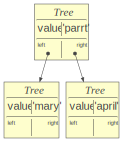

In [16]:
root = Tree('parrt')
root.left = Tree('mary')
root.right = Tree('april')
treeviz(root)

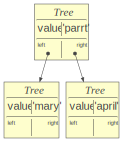

In [17]:
root = Tree('parrt', Tree('mary'), Tree('april'))
treeviz(root)

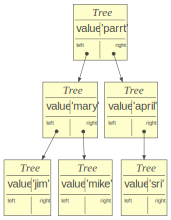

In [25]:
root = Tree('parrt')
mary = Tree('mary')
april = Tree('april')
jim = Tree('jim')
sri = Tree('sri')
mike = Tree('mike')

root.left = mary
root.right = april
mary.left = jim
mary.right = mike
april.right = sri

treeviz(root)

### Exercise

Create a class definition for `NTree` that allows arbitrary numbers of children. (Use a list for field `children` rather than `left` and `right`.)  The constructor should init an empty children list.  Test your code using:

```python
from lolviz import objviz
root2 = NTree('parrt')
mary = NTree('mary')
april = NTree('april')
jim = NTree('jim')
sri = NTree('sri')
mike = NTree('mike')

root2.addchild(mary)
root2.addchild(jim)
root2.addchild(sri)
sri.addchild(mike)
sri.addchild(april)

objviz(root2)
```

#### Solution

In [23]:
class NTree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.children = []
        
    def addchild(self, child):
        if isinstance(child, Tree):
            self.children.append(child)

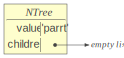

In [24]:
root2 = NTree('parrt')
mary = NTree('mary')
april = NTree('april')
jim = NTree('jim')
sri = NTree('sri')
mike = NTree('mike')

root2.addchild(mary)
root2.addchild(jim)
root2.addchild(sri)
sri.addchild(mike)
sri.addchild(april)

objviz(root2)

### Walking trees

Walking a tree is a matter of moving a cursor like we did with the linked lists above. We start out by having the cursor point at the root of the tree and then walk downwards until we hit leaves, and then we come back up. Let's code this up but make a regular function not a method of the tree class to keep things simple. Let's look at that tree again:

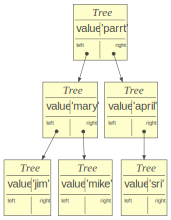

In [28]:
treeviz(root)

In [26]:
def walk(t):
    if t is None: return
    print(t.value)
    walk(t.left)
    walk(t.right)
    
walk(root)

parrt
mary
jim
mike
april
sri


That is a recursive function, meaning that `walk` calls itself. Don't let the recursion where you, just pretend that you are calling a different function or that you are calling the same function but it is known to be correct. We call that the recursive leap of faith. 

As the old joke goes: "*To truly understand recursion, you must first understand recursion.*"

Notice the order in which we visit nodes. When we process a node and then it's children, we call that a *preorder traversal*. If we process a node after walking the children, we call it a *post-order traversal*:

In [27]:
def walk(t):
    if t is None: return
    walk(t.left)
    walk(t.right)
    print(t.value)
    
walk(root)

jim
mike
mary
sri
april
parrt


In both cases we are performing a *depth-first walk* of the tree, which means that we are immediately seeking the leaves rather than the immediate children.   A depth first walk scans down all of the left child fields of the nodes until it hits a leaf and then goes back up a level.  In contrast, a *breadth-first walk*  processes all children before looking at grandchildren.  This is a less common walk but, for our tree, would be the sequence parrt, mary, april, jim, mike, sri.  In a sense, breadth first processes one level of the tree at a time.

## Graphs

Trees are actually directed, acyclic graphs. If we remove the acyclic restriction, we get a general graph. These are also extremely common in computer science and are used to represent graphs of users in a social network or a graph of webpages, which is how Google does page ranking.

### graphviz

You might find it useful to display graphs visually and [graphviz](https://www.graphviz.org/) is an excellent way to do that. Here's an example

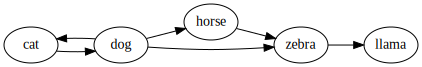

In [35]:
import graphviz as gv

gv.Source("""
digraph G {
    rankdir=LR;
    cat->dog
    dog->cat
    dog->horse
    dog->zebra
    horse->zebra
    zebra->llama
}
""")

Once again, it's very convenient to represent a note in this graph as an object, which means we need a class definition:

In [38]:
class GNode:
    def __init__(self, value):
        self.value = value
        self.edges = [] # outgoing edges
        
    def connect(self, other):
        self.edges.append(other)

In [39]:
cat = GNode('cat')
dog = GNode('dog')
horse = GNode('horse')
zebra = GNode('zebra')
llama = GNode('llama')

cat.connect(dog)
dog.connect(cat)
dog.connect(horse)
dog.connect(zebra)
horse.connect(zebra)
zebra.connect(llama)

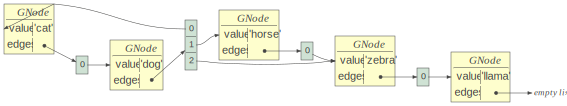

In [40]:
objviz(cat)

# Operator overloading

(Note: We *overload* operators but *override* methods in a subclass definition)

Python allows class definitions to implement functions that are called when standard operator symbols such as `+` and `/` are applied to objects of that type. This is extremely useful for mathematical libraries such as numpy, but is often abused. Note that you could redefine subtraction to be multiplication when someone used the `-` sign. (Yikes!)

Here's an extension to `Point` that supports `+` for `Point` addition:

In [41]:
import numpy as np

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, other):
        return np.sqrt( (self.x - other.x)**2 + (self.y - other.y)**2 )
    
    def __add__(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x,y)
    
    def __str__(self):
        return f"({self.x},{self.y})"

In [42]:
p = Point(3,4)
q = Point(5,6)
print(p, q)
print(p + q) # calls p.__add__(q) or Point.__add__(p,q)
print(Point.__add__(p,q))

(3,4) (5,6)
(8,10)
(8,10)


## Exercise

Add a method to implement the `-` subtraction operator for `Point` so that the following code works:

```python
p = Point(5,4)
q = Point(1,5)
print(p, q)
print(p - q)
```

In [46]:
import numpy as np

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, other):
        return np.sqrt( (self.x - other.x)**2 + (self.y - other.y)**2 )
    
    def __add__(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x,y)
    
    def __sub__(self,other):
        x = self.x - other.x
        y = self.y - other.y
        return Point(x,y)
    
    def __str__(self):
        return f"({self.x},{self.y})"
    
p = Point(5,4)
q = Point(1,5)
print(p, q)
print(p - q)

(5,4) (1,5)
(4,-1)
